### Project Title: Brain Activity Prediction using EEG and Machine Learning
Epilepsy Seizure Recognition

### Group Members:
| Name              | ID          |
|-------------------|-------------|
| Tesfaye Adugna    | UGR/4709/12 |
| Ephrem Alemayehu  | UGR/4365/12 |
| Gizaw Dagne       | UGR/6640/12 |

### School:
- Addis Ababa University, Addis Ababa Institute of Technology Campus




## Epileptic seizure recognition

### Project Overview

Epilepsy is a chronic brain disorder affecting 50 million people worldwide, with 80% living in developing countries. Detection typically relies on expert analysis of electroencephalogram (EEG) patterns. This project aims to develop an automated detection system using deep learning, eliminating the need for feature extraction from EEG signals.

#### Key Features
- **Deep Learning Approach:** Utilizes raw EEG data for training, bypassing manual feature engineering.
- **High Accuracy:** Achieves 100% accuracy in binary classification (seizure vs. seizure-free) and avoids false negatives in multiclass problems.
- **Open-Source Tools:** Ensures accessibility for broad application and assistance in epilepsy detection.

This method offers a reliable and accessible alternative to conventional systems, aiding in the diagnosis and management of epilepsy.

### Library Imports

Necessary libraries for data manipulation, visualization, preprocessing, feature selection, model training, and evaluation are imported here.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest, RFECV
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sn


import warnings; warnings.simplefilter('ignore')
%matplotlib inline


### About the Dataset

This dataset comprises pre-processed EEG recordings for epileptic seizure detection, sourced from the UCI Machine Learning Repository. Originally, it consisted of 500 individuals, each with 23.6 seconds of brain activity data sampled into 4097 data points. The dataset has been reshaped into 11500 pieces of information, with each piece representing 1 second of EEG recording. 

#### Attribute Information:
- Explanatory variables X1 to X178 represent EEG data.
- The response variable y (column 179) categorizes the input vector:
    - 1: Seizure activity
    - 2: EEG recording from the tumor location
    - 3: EEG activity from healthy brain areas with identified tumor
    - 4: EEG with eyes closed
    - 5: EEG with eyes open
    
Subjects in classes 2, 3, 4, and 5 do not have epileptic seizures, whereas class 1 represents those with seizures. Most analyses focus on binary classification, distinguishing class 1 (seizures) from the rest.

Source: Kaggle Machine Learning Repository
s y in column 179, the Explanatory variables X1, X2, ..., X178 

### Dataset Loading and Initial Exploration

Loading the 'Epileptic Seizure Recognition' dataset from a CSV file. 
- The dataset contains EEG recordings for seizure detection.
- Shape: [Number of rows, Number of columns]
- Displaying the first few rows of the dataset for initial exploration.


In [4]:
dataset = pd.read_csv('Epileptic Seizure Recognition.csv')
dataset.shape


(11500, 180)

### Class Distribution Analysis

Analyzing the distribution of classes in the dataset.
- The target variable 'y' is analyzed to understand class distribution.
- Countplot visualizes the distribution of seizure and non-seizure classes.
- The number of trials for each class is displayed.


The number of trials for the non-seizure class is: 9200
The number of trials for the seizure class is: 2300


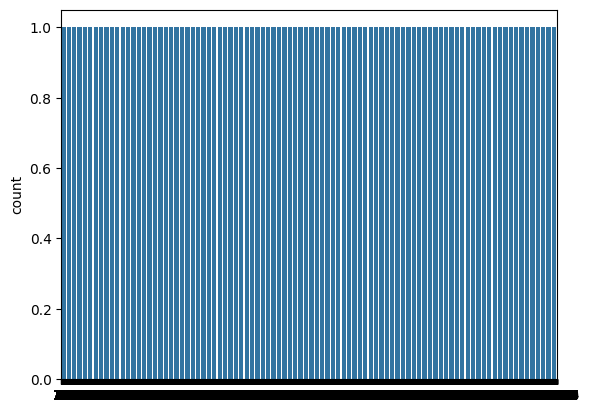

In [5]:
cols = dataset.columns
tgt = dataset.y
tgt[tgt>1]=0
ax = sn.countplot(tgt,label="Count")
non_seizure, seizure = tgt.value_counts()
print('The number of trials for the non-seizure class is:', non_seizure)
print('The number of trials for the seizure class is:', seizure)

## Class Distribution Analysis

Examining the class distribution shows:
- 9200 trials represent the non-seizure class.
- 2300 trials represent the seizure class.

### Feature Extraction
Extracting features from the dataset.

- Features are extracted from the dataset excluding the target variable.
- Shape of the feature matrix (X): [Number of samples, Number of features]


In [6]:
X = dataset.iloc[:,1:179].values
X.shape

(11500, 178)

### EEG Visualization
Visualizing EEG data for different classes.
- Plots represent EEG recordings for different classes.
- Each subplot corresponds to a specific class.
- X-axis: Samples; Y-axis: Microvolts (uV)


Text(0.5, 0, 'Samples')

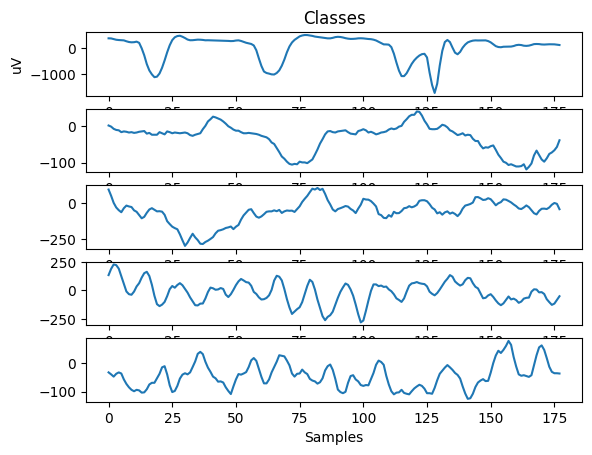

In [7]:
plt.subplot(511)
plt.plot(X[1,:])
plt.title('Classes')
plt.ylabel('uV')
plt.subplot(512)
plt.plot(X[7,:])
plt.subplot(513)
plt.plot(X[12,:])
plt.subplot(514)
plt.plot(X[0,:])
plt.subplot(515)
plt.plot(X[2,:])
plt.xlabel('Samples')

In [8]:
y = dataset.iloc[:,179].values
y

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

To make this a binary problem, let's turn the non-seizure classes 0 while maintaining the seizure as 1.

In [9]:
y[y>1]=0
y

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

### Data Splitting
Splitting the dataset into training and testing sets.
- Features (X) and target variable (y) are divided into training and testing sets.
- Test size: 20% of the data.


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

### Data Standardization
Standardize the feature data for improved model performance.
- Utilize StandardScaler to normalize feature values.
- Transform both training and testing feature sets accordingly.


In [12]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
X_train[0,0:30]

array([0.40308281, 0.40970527, 0.44517919, 0.39903332, 0.2993143 ,
       0.28138126, 0.31737429, 0.25312269, 0.17975795, 0.18607337,
       0.29587728, 0.40788437, 0.34154209, 0.2479478 , 0.1604444 ,
       0.10826252, 0.0735129 , 0.03236783, 0.05571777, 0.08531657,
       0.16747917, 0.15792303, 0.21574248, 0.17413091, 0.2474411 ,
       0.26698249, 0.39088939, 0.44793616, 0.52293871, 0.41394986])

In [14]:
y_train[0:30]

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

Let's investigate how accurate the simplest model can achieve by applying a Logistic Regression to our data.

### Model Training and Evaluation
Train a logistic regression classifier and evaluate its performance.
- Fit the classifier to the training data.
- Predict target labels using the test data.
- Calculate the mean accuracy using cross-validation.
- Generate a confusion matrix and classification report.
- Visualize the confusion matrix using a heatmap.


In [15]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [16]:
y_pred = classifier.predict(X_test)

In [17]:
accuracies = cross_val_score(estimator = classifier,
                             X = X_train,
                             y = y_train,
                             cv = 10,
                             n_jobs = -1)
accuracies.mean()

0.8179347826086957

              precision    recall  f1-score   support

 Non-seizure       0.81      1.00      0.90      1834
     Seizure       1.00      0.09      0.17       466

    accuracy                           0.82      2300
   macro avg       0.91      0.55      0.53      2300
weighted avg       0.85      0.82      0.75      2300



<Axes: >

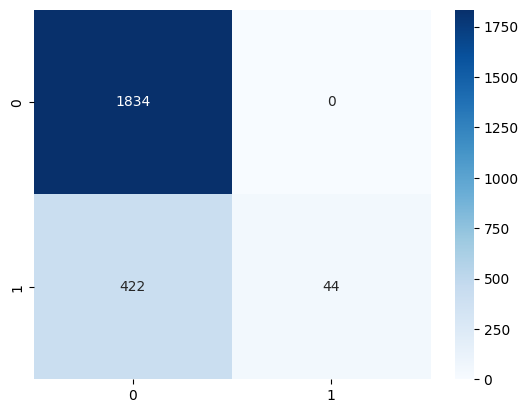

In [18]:
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred, target_names=['Non-seizure', 'Seizure']))

df_cm = pd.DataFrame(cm, range(2), range(2))
sn.heatmap(df_cm, annot=True,fmt='g',cmap ='Blues')# font size

With a simple Logistic Regression the classifier was not able to separate the classes in a linear fashion.

Let's try to apply Random Forest with boosting, more specificaly Gradient Boosting, or XGBoost.

## XGBoost Model Training and Evaluation
Train an XGBoost classifier and evaluate its performance.
- Fit the XGBoost classifier to the training data.
- Calculate mean accuracy using cross-validation.
- Calculate standard deviation of accuracies.
- Generate a confusion matrix and classification report.
- Visualize the confusion matrix using a heatmap.


In [19]:
from xgboost import XGBClassifier

clf = XGBClassifier()
clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [20]:
y_pred = clf.predict(X_test)

In [21]:
accuracies = cross_val_score(estimator = clf,
                             X = X_train,
                             y = y_train,
                             cv = 10,
                             n_jobs = -1)
accuracies.mean()

0.9722826086956522

In [22]:
accuracies.std()

0.006248818413828176

              precision    recall  f1-score   support

 Non-seizure       0.97      0.99      0.98      1834
     Seizure       0.97      0.90      0.94       466

    accuracy                           0.97      2300
   macro avg       0.97      0.95      0.96      2300
weighted avg       0.97      0.97      0.97      2300



<Axes: >

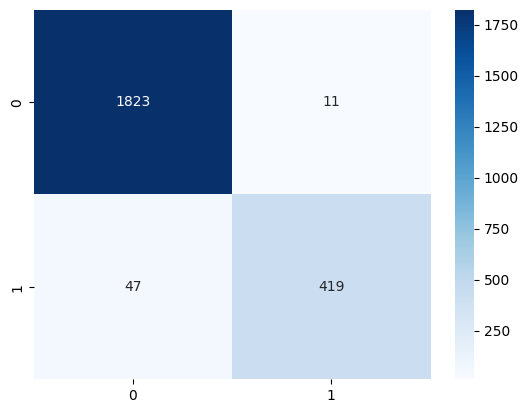

In [23]:
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred, target_names=['Non-seizure', 'Seizure']))

df_cm = pd.DataFrame(cm, range(2), range(2))
sn.heatmap(df_cm, annot=True,fmt='g',cmap ='Blues')# font size

Using boosting techniques to the random forest classifier (XGBoost) we are able to obtain near perfect accuracies on our data! But that's not telling the whole history, let's investigate our features even further.

## Artificial Neural Networks

Let's try using a simple, shallow neural network on our problem

Epoch 1/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8785 - loss: 0.3554 - val_accuracy: 0.9526 - val_loss: 0.1511
Epoch 2/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9474 - loss: 0.1652 - val_accuracy: 0.9509 - val_loss: 0.1397
Epoch 3/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9518 - loss: 0.1503 - val_accuracy: 0.9513 - val_loss: 0.1203
Epoch 4/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9539 - loss: 0.1318 - val_accuracy: 0.9591 - val_loss: 0.0989
Epoch 5/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9526 - loss: 0.1286 - val_accuracy: 0.9570 - val_loss: 0.1007
Epoch 6/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9506 - loss: 0.1283 - val_accuracy: 0.9609 - val_loss: 0.0874
Epoch 7/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9544 - loss: 0.1157 - val_accuracy: 0.9665 - val_loss: 0.0806
Epoch 8/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9574 - loss: 0.1154 - val_accu

<Axes: >

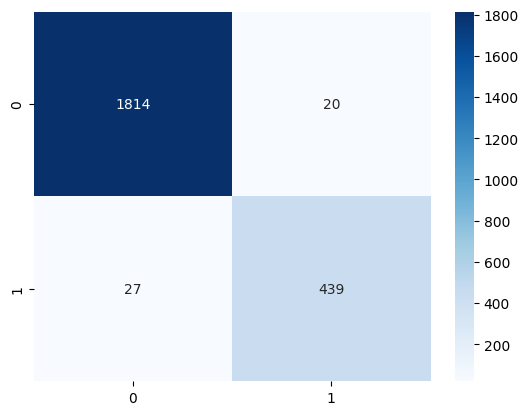

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
import seaborn as sn

# Define EarlyStopping callback
early_stop = EarlyStopping(monitor='val_accuracy',
                           min_delta=0,
                           patience=10,
                           verbose=1,
                           mode='auto')

# Initialize the ANN
clf_ann = Sequential()

# Add the input layer and the first hidden layer
clf_ann.add(Dense(activation="relu",
                  kernel_initializer="uniform", 
                  units=100,
                  input_dim=178))
clf_ann.add(BatchNormalization())
clf_ann.add(Dropout(0.5))

# Add the second hidden layer
clf_ann.add(Dense(activation="relu",
                  kernel_initializer="uniform",
                  units=100))
clf_ann.add(BatchNormalization())
clf_ann.add(Dropout(0.5))

# Add the output layer
clf_ann.add(Dense(units=1,
                  kernel_initializer="uniform",
                  activation="sigmoid"))

# Compile the ANN
clf_ann.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])

# Fit the ANN to the Training set
clf_ann.fit(X_train, y_train,
            batch_size=32,
            epochs=100,
            validation_data=(X_test, y_test),
            callbacks=[early_stop])

# Making the predictions on the Test set
y_pred = clf_ann.predict(X_test)
y_pred = (y_pred > 0.5)

# Calculate the Confusion Matrix and Classification Report
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred, target_names=['Non-seizure', 'Seizure']))

# Visualize the Confusion Matrix
df_cm = pd.DataFrame(cm, range(2), range(2))
sn.heatmap(df_cm, annot=True, fmt='g', cmap='Blues')  # font size
